# Reading CTD data with PySeabird

## Author: Guilherme Castelão

pySeabird is a package to parse/load CTD data files. It should be an easy task but the problem is that the format have been changing along the time. Work with multiple ships/cruises data requires first to understand each file, to normalize it into a common format for only than start your analysis. That can still be done with few general regular expression rules, but I would rather use strict rules. If I'm loading hundreds or thousands of profiles, I want to be sure that no mistake passed by. I rather ignore a file in doubt and warn it, than belive that it was loaded right and be part of my analysis.

With that in mind, I wrote this package with the ability to load multiple rules, so new rules can be added without change the main engine.

For more information, check the documentatio

In [1]:
%matplotlib inline

from seabird.cnv import fCNV
from gsw import z_from_p

Let's first download an example file with some CTD data

In [2]:
!wget https://raw.githubusercontent.com/castelao/seabird/master/sampledata/CTD/dPIRX003.cnv

--2016-09-04 21:50:24--  https://raw.githubusercontent.com/castelao/seabird/master/tests/data/CTD/dPIRX003.cnv
Resolving raw.githubusercontent.com... 151.101.24.133
Connecting to raw.githubusercontent.com|151.101.24.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47291 (46K) [text/plain]
Saving to: ‘dPIRX003.cnv’

dPIRX003.cnv        100%[===================>]  46.18K  --.-KB/s    in 0.05s   

2016-09-04 21:50:25 (849 KB/s) - ‘dPIRX003.cnv’ saved [47291/47291]



In [3]:
profile = fCNV('dPIRX003.cnv')

DEBUG:root:Openning file: dPIRX003.cnv


The profile dPIRX003.cnv.OK was loaded with the default rule cnv.yaml

In [4]:
print("Header: %s" % profile.attributes.keys())
print("Data: %s" % profile.keys())

Header: ['instrument_type', u'sbe_model', u'file_type', u'seasave', u'start_time', u'nquan', 'LONGITUDE', 'datetime', u'bad_flag', u'nvalues', 'LATITUDE', 'filename', 'md5']
Data: [u'timeS', u'PRES', u'TEMP', u'TEMP2', u'CNDC', u'CNDC2', u'potemperature', u'potemperature2', u'PSAL', u'PSAL2', 'flag']


We have latitude in the header, and pressure in the data.

In [5]:
z = z_from_p(profile['PRES'], profile.attributes['LATITUDE'])

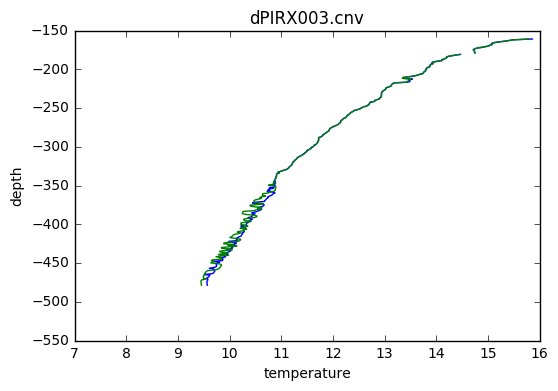

In [6]:
from matplotlib import pyplot as plt

plt.plot(profile['TEMP'], z,'b')
plt.plot(profile['TEMP2'], z,'g')
plt.xlabel('temperature')
plt.ylabel('depth')
plt.title(profile.attributes['filename'])